<a href="https://colab.research.google.com/github/Kenuuey/LLMs/blob/main/LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Type Annotations

Union

In [6]:
from typing import Union

def square(x: Union[int, float]) -> float:
  return x * x

x = 5
print(square(x))

x = 1.234
print(square(x))

x = "I am a string"
# print(square(x))

25
1.522756


Optional

In [13]:
from typing import Optional

def nice_message(name: Optional[str]) -> None:
  if name is None:
    print("Hey random person!")
  else:
    print(f"Hi there, {name}!")

s = 'user'
print(nice_message(s))

s = None
print(nice_message(s))

Hi there, user!
None
Hey random person!
None


Any

In [17]:
from typing import Any

def print_value(x: Any):
  print(x)

print_value('Hesufnadofudsfn')
print_value(2314412)
print_value(5.1514)

Hesufnadofudsfn
2314412
5.1514


Lambda Function

In [18]:
square = lambda x: x * x

square(10)

100

In [20]:
nums = [1, 2, 3, 4]

squares = list(map(lambda x: x * x, nums))

squares

[1, 4, 9, 16]

### Agent 1

In [ ]:
!pip install -qqq langgraph

In [26]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [62]:
class AgentState(TypedDict): # state schema
  message : str


def greeting_node(state: AgentState) -> AgentState:
  """Simple node that adds a greeting message to the state"""
  state['message'] = 'Hey ' + state['message'] + ', how is your day going?'
  return state

def compliment_node(state: AgentState) -> AgentState:
  """Node that adds a personalized compliment agent"""
  state['message'] = state['message'] + ' Nice to meet you!'
  return state

In [63]:
graph = StateGraph(AgentState)

graph.add_node('greeter', greeting_node)
graph.add_node('compliment', compliment_node)

graph.add_edge('greeter', 'compliment')

graph.set_entry_point('greeter')
graph.set_finish_point('greeter')

app = graph.compile()

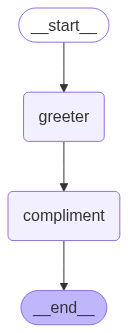

In [64]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [65]:
result = app.invoke({'message': 'Bob'})
print(result['message'])

Hey Bob, how is your day going? Nice to meet you!


### Agent 2